In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
diabetesData= pd.read_csv("/content/drive/MyDrive/diabetes-predictor/pima.csv")
print(diabetesData.shape)
diabetesData.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
y = diabetesData['Outcome']
X = diabetesData.drop('Outcome', axis=1, inplace=False)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=['Pregnancies','Glucose','BloodPressure','SkinThickness',
                             'Insulin','BMI','DiabetesPedigreeFunction','Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [ ]:
# Models
# A
# 1. Decision Tree
# 2. KNN
# 3. Guassian Naive Bayes
# 4. Random Forest
# 5. SVM

# B
# 1. Voting Classifier

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier()
dectree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dectree = dectree.predict(X_test)

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_dectree))
print('\n')
print('Accuracy')
print(accuracy_score(y_test, y_pred_dectree))

Confusion Matrix
[[123  34]
 [ 28  46]]


Accuracy
0.7316017316017316


Text(0, 0.5, 'Error rate')

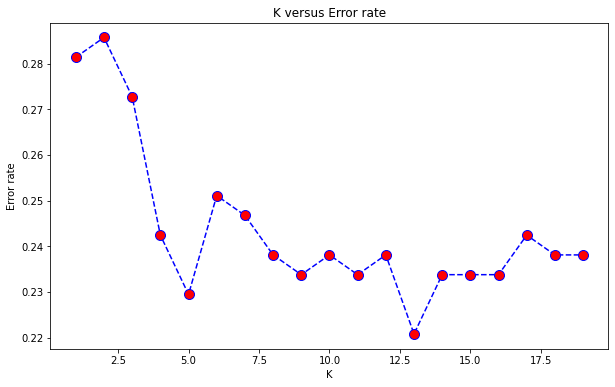

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

error_rate = []

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 6))

plt.plot(range(1, 20), error_rate, color='blue', linestyle='--', markersize=10, markerfacecolor='red', marker='o')

plt.title('K versus Error rate')

plt.xlabel('K')
plt.ylabel('Error rate')

In [ ]:
# The accuracy on the test dataset is maximum with 13 neighbors

knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [ ]:
y_pred_knn = knn.predict(X_test)

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_knn))
print('\n')
print('Accuracy')
print(accuracy_score(y_test, y_pred_knn))

Confusion Matrix
[[141  16]
 [ 35  39]]


Accuracy
0.7792207792207793


In [ ]:
#GuassianNB

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_gnb))
print('\n')
print('Accuracy')
print(accuracy_score(y_test, y_pred_gnb))

Confusion Matrix
[[138  19]
 [ 36  38]]


Accuracy
0.7619047619047619


In [ ]:
#RandomForest

from sklearn.ensemble import RandomForestClassifier

ranfor = RandomForestClassifier(random_state=0,n_estimators=20,max_samples=200)
ranfor.fit(X_train, y_train)

RandomForestClassifier(max_samples=200, n_estimators=20, random_state=0)

In [ ]:
y_pred_ranfor = ranfor.predict(X_test)

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_ranfor))
print('\n')
print('Accuracy')
print(accuracy_score(y_test, y_pred_ranfor))

Confusion Matrix
[[144  13]
 [ 42  32]]


Accuracy
0.7619047619047619


In [ ]:
#SVM

from sklearn.svm import SVC
svm= SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_svm))
print('\n')
print('Accuracy')
print(accuracy_score(y_test, y_pred_svm))

Confusion Matrix
[[138  19]
 [ 38  36]]


Accuracy
0.7532467532467533


In [ ]:
# Voting Classifier without weights

from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=[('DecisionTree',dectree),('KNN',knn),('GaussianNB',gnb),('RandomForest',ranfor),('SVM',svm)], 
                      voting='soft')
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('DecisionTree', DecisionTreeClassifier()),
                             ('KNN', KNeighborsClassifier(n_neighbors=13)),
                             ('GaussianNB', GaussianNB()),
                             ('RandomForest',
                              RandomForestClassifier(max_samples=200,
                                                     n_estimators=20,
                                                     random_state=0)),
                             ('SVM', SVC(probability=True))],
                 voting='soft')

In [ ]:
y_pred_vc = vc.predict(X_test)

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_vc))
print('\n')
print('Accuracy')
print(accuracy_score(y_test, y_pred_vc))

Confusion Matrix
[[141  16]
 [ 31  43]]


Accuracy
0.7965367965367965


In [ ]:
# Voting Classifier with weights

vc1 = VotingClassifier(estimators=[('DecisionTree',dectree),('KNN',knn),('GaussianNB',gnb),('RandomForest',ranfor),('SVM',svm)], 
                      voting='soft', weights=[1,2,2,2,1])
vc1.fit(X_train, y_train)

VotingClassifier(estimators=[('DecisionTree', DecisionTreeClassifier()),
                             ('KNN', KNeighborsClassifier(n_neighbors=13)),
                             ('GaussianNB', GaussianNB()),
                             ('RandomForest',
                              RandomForestClassifier(max_samples=200,
                                                     n_estimators=20,
                                                     random_state=0)),
                             ('SVM', SVC(probability=True))],
                 voting='soft', weights=[1, 2, 2, 2, 1])

In [ ]:
y_pred_vc1 = vc1.predict(X_test)

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_vc1))
print('\n')
print('Accuracy')
print(accuracy_score(y_test, y_pred_vc1))

Confusion Matrix
[[143  14]
 [ 33  41]]


Accuracy
0.7965367965367965


In [23]:
print('Model Accuracy')
print('\n')
print('Decision Tree: '+str(round(accuracy_score(y_test, y_pred_dectree)*100,2))+'%')
print('GuassianNB: '+str(round(accuracy_score(y_test, y_pred_gnb)*100,2))+'%')
print('KNN: '+str(round(accuracy_score(y_test, y_pred_knn)*100,2))+'%')
print('\n')
print('Averaging Method')
print('Random Forest: '+str(round(accuracy_score(y_test, y_pred_ranfor)*100,2))+'%')
print('\n')
print('SVM Method')
print('SVC: '+str(round(accuracy_score(y_test, y_pred_svm)*100,2))+'%')
print('\n')
print('Voting Classifiers')
print('Voting Classifier without Weights: '+str(round(accuracy_score(y_test, y_pred_vc)*100,2))+'%')
print('Voting Classifier with Weights: '+str(round(accuracy_score(y_test, y_pred_vc1)*100,2))+'%')

Model Accuracy


Decision Tree: 73.16%
GuassianNB: 76.19%
KNN: 77.92%


Averaging Method
Random Forest: 76.19%


SVM Method
SVC: 75.32%


Voting Classifiers
Voting Classifier without Weights: 79.65%
Voting Classifier with Weights: 79.65%


In [25]:
# Creating a pickle file for the classifier
save_classifier = open("diabetes.pickle","wb")
pickle.dump(vc, save_classifier)
save_classifier.close()